<a href="https://colab.research.google.com/github/MonsterFinger/git-basics/blob/master/DataSusConvert2csv%26json%26rpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download .DBC files from DATASUS, extract them into .DBF an then convert into .CSV and JSON - using Python (data frame)  and Bash.

## Create data directory to store .DBC, .DBF & .CSV files type



In [19]:
#define var file source without the type.
source = 'DORR2016'
source1 = 'DORR2017'
source2 = 'DORR2018'






In [20]:
#!rm -rf /content/*
!mkdir data

## Verify if it has been created

In [21]:
!ls
%cd data

data
/content/data


##Go to data dir and download .dbc file(s) from DATASUS


In [22]:
import shutil
import urllib.request as request
from contextlib import closing

def downloadFile(source):
  url = 'ftp://ftp.datasus.gov.br/dissemin/publicos/SIM/CID10/DORES/'+ source +'.dbc'
  with closing(request.urlopen(url)) as r:
      with open(source +'.dbc', 'wb') as f:
          shutil.copyfileobj(r, f)



In [23]:
downloadFile(source)
downloadFile(source1)
downloadFile(source2)

##Change to content dir

In [24]:
%cd /content/

/content


##Download script dbc2dbf.sh from github
 

In [25]:
!wget https://raw.githubusercontent.com/greatjapa/dbc2csv/4a68def8b24833a5562a2eedf393ac49e9e2a959/dbc2dbf.sh

--2020-11-23 20:03:03--  https://raw.githubusercontent.com/greatjapa/dbc2csv/4a68def8b24833a5562a2eedf393ac49e9e2a959/dbc2dbf.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113 [text/plain]
Saving to: ‘dbc2dbf.sh’

dbc2dbf.sh          100%[===================>]     113  --.-KB/s    in 0s      

2020-11-23 20:03:03 (5.39 MB/s) - ‘dbc2dbf.sh’ saved [113/113]



##Install and import the package dbfread in order to work with dbf file types

In [26]:
!pip install dbfread
from dbfread import DBF

## Go to the root dir (/content in google colab)

In [27]:
%cd /content/

/content


##Download blast-dbf from Git hub

In [28]:
!git clone https://github.com/eaglebh/blast-dbf

Cloning into 'blast-dbf'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


##Run the compiler to create the blast-dbf binary

In [29]:
#!pwd
%cd blast-dbf/
!make blast-dbf

/content/blast-dbf
cc -o blast-dbf blast.c blast-dbf.c


##Change to root dir (/content)

In [30]:
#!pwd
%cd /content


/content


##Run script dbc2dbf which will  generate .dbf files from /content/data/*.dbc

In [31]:
!sh ./dbc2dbf.sh

data/DORR2016.dbc converted to dbf
data/DORR2017.dbc converted to dbf
data/DORR2018.dbc converted to dbf


##Create the following function dbf_to_csv

In [32]:
#Input a dbf, output a csv, same name, same path, except extension
def dbf_to_csv(dbf_table_pth):
    csv_fn = dbf_table_pth[:-4]+ ".csv" #Set the csv file name
    table = DBF(dbf_table_pth)# table variable is a DBF object
    with open(csv_fn, 'w', newline = '') as f:# create a csv file, fill it with dbf content
        writer = csv.writer(f)
        writer.writerow(table.field_names)# write the column name
        for record in table:# write the rows
            writer.writerow(list(record.values()))
    return csv_fn# return the csv name

## Import csv into python 

In [33]:
import csv

##Run the dbf_csv function below

In [34]:

dbf_to_csv('/content/data/'+source+'.dbf')
dbf_to_csv('/content/data/'+source1+'.dbf')
dbf_to_csv('/content/data/'+source2+'.dbf')

'/content/data/DORR2018.csv'

#Now let's generate a .JSON file based on the generated .CSV

## Let's load json and pandas libraries into Python

In [35]:
import json 
import pandas as pd

## Create the dataframe based the new CSV recent created


In [36]:
df = pd.read_csv (r'/content/data/'+source+'.csv')
df1 = pd.read_csv (r'/content/data/'+source1+'.csv')
df2 = pd.read_csv (r'/content/data/'+source2+'.csv')


##Generate a .JSON file format based on .CSV with DF

In [37]:
df.to_json (r'/content/data/'+source+'.json')
df1.to_json (r'/content/data/'+source1+'.json')
df2.to_json (r'/content/data/'+source2+'.json')

##Now we can use some functions to display the Data Frame

In [38]:
#df.head
df.columns
#df.tail
#df.size
#df.head
#df.describe
#df.shape
#df["IDADE"]

Index(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC',
       'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB',
       'ESTABDESCR', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'CB_PRE', 'CRM', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO',
       'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA',
       'DIFDATA', 'NUDIASOBCO', 'NUD

In [39]:
#dfn = df["DTNASC"]
#dfo = df["DTOBITO"]


In [40]:
#dfo.describe

In [41]:
#dfn 


In [42]:
import datetime
import math





In [43]:
    #Calculate the age

def calcularIdade(dfin):
  dfin["IDADE_CALC"] = ""
  for i in dfin.index :
        if math.isnan(dfin['DTNASC'][i]):
          dfin['IDADE_CALC'][i]=0
          #print()
        else:
          try:
              date_str_n = str(dfin['DTNASC'][i])
              format_str_n = '%d%m%Y.0' # The format
              #print(i)
              datetime_obj_n = datetime.datetime.strptime(date_str_n, format_str_n)
              #print(datetime_obj_n.date())
              date_str_o = str(dfin['DTOBITO'][i])
              format_str_o = '%d%m%Y' # The format
              datetime_obj_o = datetime.datetime.strptime(date_str_o, format_str_o)
              #print(datetime_obj_o.date())
              life_time = datetime_obj_o - datetime_obj_n
              days_in_year = 365.2425
              age = life_time.days
              idade = age/days_in_year
              dfin['IDADE_CALC'][i]=int(idade)
          except:
            dfin['IDADE_CALC'][i]=0

In [44]:
calcularIdade(df)
calcularIdade(df1)
calcularIdade(df2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [45]:
df_obitos_por_idade = df['IDADE_CALC'].value_counts().sort_index()
df_obitos_por_idade1 = df1['IDADE_CALC'].value_counts().sort_index()
df_obitos_por_idade2 = df2['IDADE_CALC'].value_counts().sort_index()


In [46]:
df_obitos_por_idade.head

<bound method NDFrame.head of 0      249
1       28
2       10
3       12
4        5
      ... 
100      5
101      3
102      2
104      1
105      1
Name: IDADE_CALC, Length: 105, dtype: int64>

Text(0, 0.5, 'Numero de obitos')

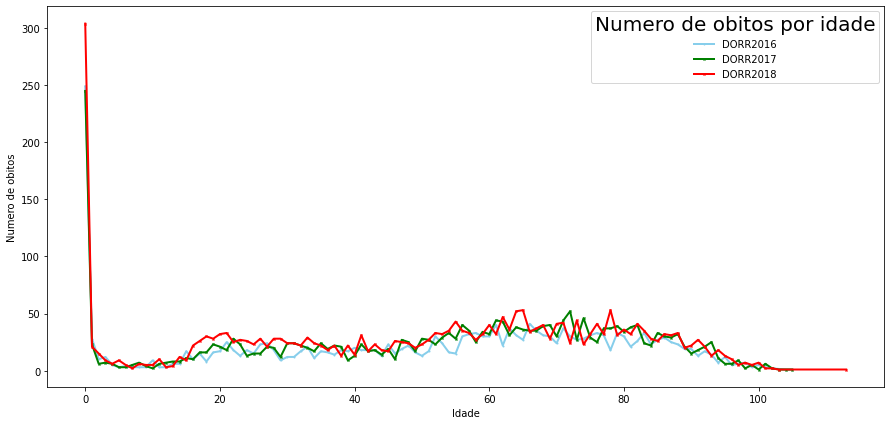

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
df_obitos_por_idade.plot(marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=2, label=source)
df_obitos_por_idade1.plot(marker='x', color='green', markersize=2, linewidth=2, label=source1)
df_obitos_por_idade2.plot(marker='x', color='red', markersize=2, linewidth=2, label=source2)
plt.legend(title = 'Numero de obitos por idade', title_fontsize = '20')
plt.xlabel("Idade")
plt.ylabel("Numero de obitos")

In [ ]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,7))
#df.plot(x="idade", y="totalObitos")
df_obitos_por_idade.plot.bar(figsize=(30,10))


#df2.plot(x="idade", y="totalObitos")

#df.plot(marker='o', markerfacecolor='blue', markersize=0, color='skyblue')



In [ ]:
df_obitos_por_idade1.plot.bar(figsize=(30,10))


In [ ]:
df_obitos_por_idade2.plot.bar(figsize=(30,10))

In [58]:
df_obitos_m = df[df['SEXO']==1]
df_obitos_f = df[df['SEXO']==2]

In [56]:
df_obitos_m['SEXO'].head

<bound method NDFrame.head of 1       1
2       1
4       1
5       1
6       1
       ..
2151    1
2152    1
2153    1
2154    1
2156    1
Name: SEXO, Length: 1353, dtype: int64>

In [59]:
df_obitos_f['SEXO'].head

<bound method NDFrame.head of 0       2
3       2
16      2
22      2
27      2
       ..
2142    2
2144    2
2147    2
2148    2
2155    2
Name: SEXO, Length: 804, dtype: int64>

In [60]:
df_obitos_por_idade_m = df_obitos_m['IDADE_CALC'].value_counts().sort_index()
df_obitos_por_idade_f = df_obitos_f['IDADE_CALC'].value_counts().sort_index()

Text(0, 0.5, 'Numero de obitos')

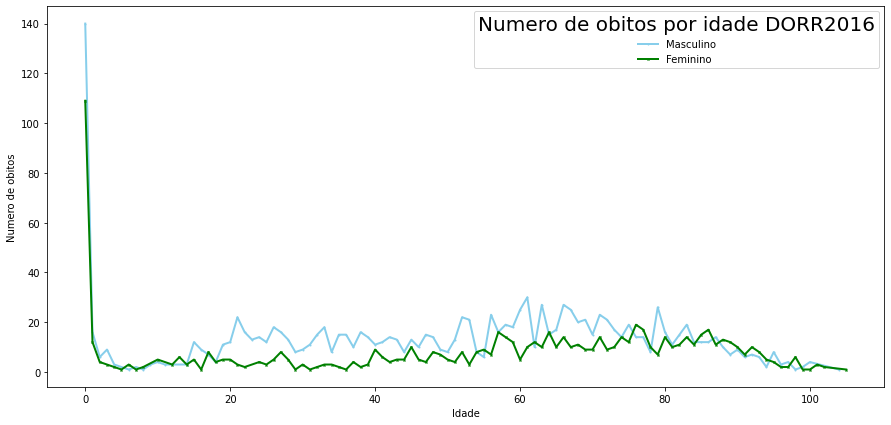

In [63]:
plt.figure(figsize=(15,7))
df_obitos_por_idade_m.plot(marker='o', markerfacecolor='blue', markersize=1, color='skyblue', linewidth=2, label='Masculino')
df_obitos_por_idade_f.plot(marker='x', color='green', markersize=2, linewidth=2, label='Feminino')
plt.legend(title = 'Numero de obitos por idade ' + source , title_fontsize = '20')
plt.xlabel("Idade")
plt.ylabel("Numero de obitos")